In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
%matplotlib inline

In [66]:
df = pd.read_csv('cofee.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS'
df.dropna(inplace=True)

In [67]:
df.head()

,Price,Change
Month,,
2000-04-01,0.98,-
2000-05-01,0.98,0.00 %
2000-06-01,0.94,-4.08 %
2000-07-01,0.90,-4.26 %
2000-08-01,0.84,-6.67 %


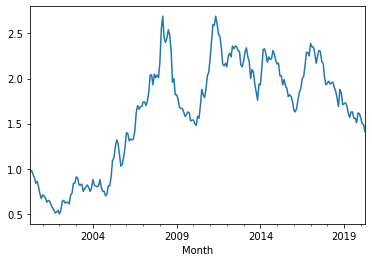

In [68]:
df['Price'].plot()

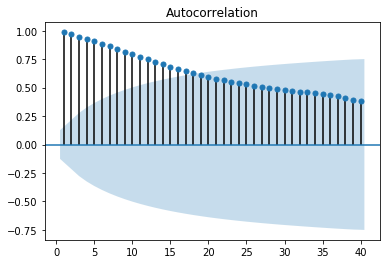

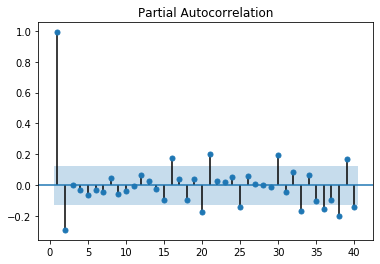

In [69]:
sgt.plot_acf(df.Price, zero=False, lags=40);
sgt.plot_pacf(df.Price, zero=False, lags=40);

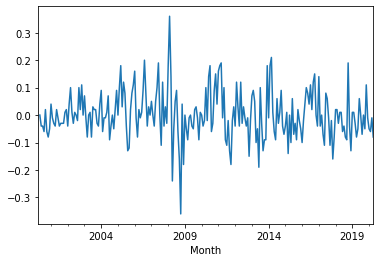

In [70]:
d1= df['Price'].diff(1)
df['d1'] = d1
df['d1'].plot()
df.dropna(inplace=True)

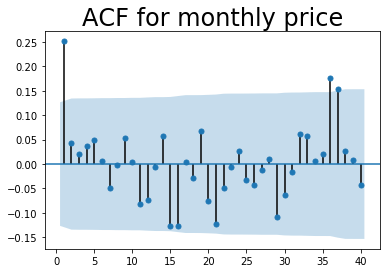

In [71]:
sgt.plot_acf(df.d1, zero=False, lags=40)
plt.title("ACF for monthly price", size=24)
plt.show()

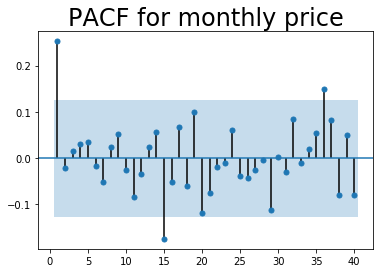

In [72]:
sgt.plot_pacf(df.d1, zero=False, lags=40)
plt.title("PACF for monthly price", size=24)
plt.show()

In [73]:
df.head()

,Price,Change,d1
Month,,,
2000-05-01,0.98,0.00 %,0.00
2000-06-01,0.94,-4.08 %,-0.04
2000-07-01,0.90,-4.26 %,-0.04
2000-08-01,0.84,-6.67 %,-0.06
2000-09-01,0.86,2.38 %,0.02


In [74]:
model = ARIMA(df['d1'], order=(1,0,0))
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     d1   No. Observations:                  240
Model:                     ARMA(1, 0)   Log Likelihood                 253.339
Method:                       css-mle   S.D. of innovations              0.084
Date:                Tue, 26 May 2020   AIC                           -500.679
Time:                        16:57:53   BIC                           -490.237
Sample:                    05-01-2000   HQIC                          -496.471
                         - 04-01-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.007      0.231      0.817      -0.013       0.016
ar.L1.d1       0.2514      0.062      4.027      0.000       0.129       0.374
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.9778           +0.0000j            3.9778            0.0000
-----------------------------------------------------------------------------
"""

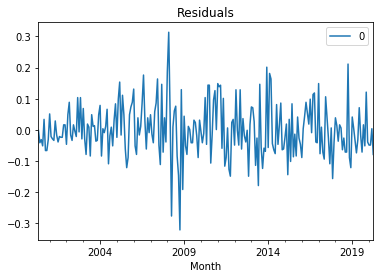

                0
count  240.000000
mean     0.000002
std      0.084368
min     -0.321030
25%     -0.051254
50%     -0.008852
75%      0.048620
max      0.313495


In [75]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals')
plt.show()
print(residuals.describe())

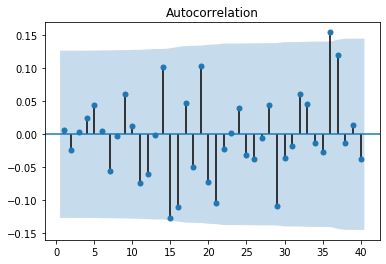

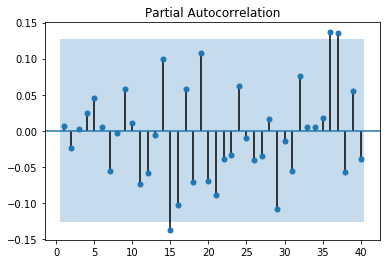

In [76]:
sgt.plot_acf(residuals, zero=False, lags=40);
sgt.plot_pacf(residuals, zero=False, lags=40);

In [77]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[10])

(array([2.55046136]), array([0.99011979]))

In [78]:
noise = np.random.random(1000)
sm.stats.acorr_ljungbox(noise, lags=[10])

(array([6.36326715]), array([0.78387587]))